In [2]:
import pandas as pd
import numpy as np
import collections
from statannotations.Annotator import Annotator

import statsmodels
import seaborn as sns

In [7]:
roberta_l_red = pd.read_csv('../cv_results/red_FacebookAI_roberta-large_cv.csv')
roberta_l_red['model'] = 'roberta-large'
roberta_red = pd.read_csv('../cv_results/red_FacebookAI_roberta-base_cv.csv')
roberta_red['model'] = 'roberta-base'
spoken_red = pd.read_csv('../cv_results/red_models_spoken_cv.csv')
spoken_red['model'] = 'spoken-9M'
wiki_red = pd.read_csv('../cv_results/red_models_wiki_cv.csv')
wiki_red['model'] = 'wiki-9M'
baby_red = pd.read_csv('../cv_results/red_models_babylm_cv.csv')
baby_red['model'] = 'babylm-9M'
red = pd.concat([spoken_red, wiki_red, baby_red, roberta_red,roberta_l_red])

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

wiki-9M vs. babylm-9M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.576e-01 U_stat=3.200e+01
spoken-9M vs. wiki-9M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.576e-01 U_stat=6.800e+01
spoken-9M vs. babylm-9M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=5.000e+01


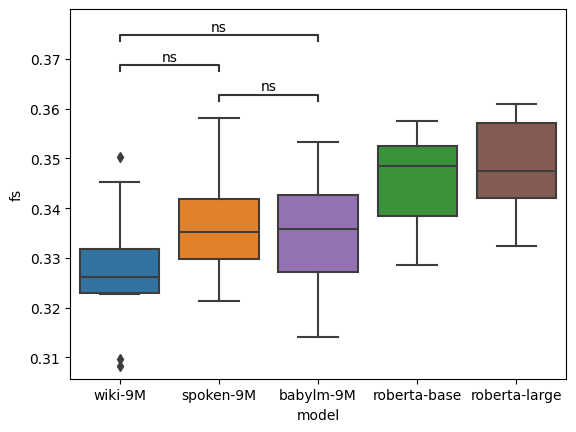

In [9]:
my_pal = {"wiki-9M": sns.color_palette("tab10")[0], "spoken-9M": sns.color_palette("tab10")[1], 
          "babylm-9M":sns.color_palette("tab10")[4], "roberta-base":sns.color_palette("tab10")[2], "roberta-large":sns.color_palette("tab10")[5]}
order = ['wiki-9M','spoken-9M','babylm-9M','roberta-base'] + ['roberta-large']

p = sns.boxplot(data=red,y='fs',x='model', order = order, palette=my_pal)
#p.set(ylabel='fs', xlabel='')
pairs = [('babylm-9M','wiki-9M'),('babylm-9M','spoken-9M'),('wiki-9M','spoken-9M')]
annot = Annotator(p, pairs, data=red, x="model", y="fs")
annot.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2, comparisons_correction = "bonferroni")
annot.apply_test()
p, test_results = annot.annotate()

p.figure.savefig('fscore_red_en.png',dpi=300)


In [11]:
roberta_l_prom = pd.read_csv('../cv_results/prom_FacebookAI_roberta-large_cv.csv')
roberta_l_prom['model'] = 'roberta-large'
roberta_prom = pd.read_csv('../cv_results/prom_FacebookAI_roberta-base_cv.csv')
roberta_prom['model'] = 'roberta-base'
spoken_prom = pd.read_csv('../cv_results/prom_models_spoken_cv.csv')
spoken_prom['model'] = 'spoken-9M'
wiki_prom = pd.read_csv('../cv_results/prom_models_wiki_cv.csv')
wiki_prom['model'] = 'wiki-9M'
baby_prom = pd.read_csv('../cv_results/prom_models_babylm_cv.csv')
baby_prom['model'] = 'babylm-9M'
prom = pd.concat([spoken_prom, wiki_prom, baby_prom, roberta_prom,roberta_l_prom])

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

spoken-9M vs. wiki-9M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.733e-02 U_stat=8.500e+01
wiki-9M vs. babylm-9M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.123e-01 U_stat=2.800e+01
spoken-9M vs. babylm-9M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.637e-01 U_stat=7.100e+01


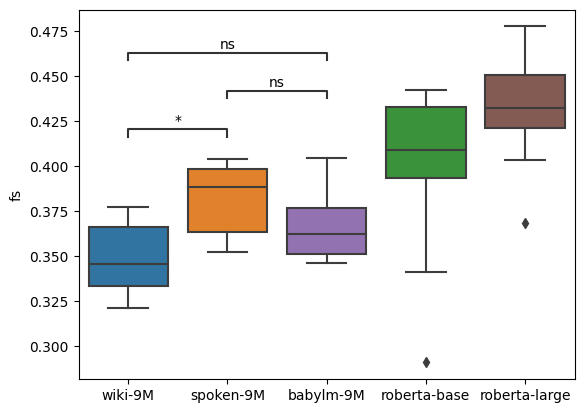

In [12]:
p = sns.boxplot(data=prom,y='fs',x='model', order = order, palette=my_pal)
p.set(ylabel='fs', xlabel='')

pairs = [('wiki-9M','spoken-9M'),('wiki-9M','babylm-9M'),('spoken-9M','babylm-9M')]
annot = Annotator(p, pairs, data=prom, x="model", y="fs")
annot.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2, comparisons_correction = "bonferroni")
annot.apply_test()

p, test_results = annot.annotate()


p.figure.savefig('fscore_prom_en.png',dpi=300)
